In [2]:
#data
import numpy as np
import pandas as pd

#visualization
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

#other
import random


## Facet Grid in seaborn

In [3]:
def rnd(size): return np.random.normal(size=size)

In [4]:
n_samples = 1000
data = pd.DataFrame()
data["Category"] = np.random.choice(["A", "B", "C"], size=n_samples)
# data["Feature"] = data["Category"] + np.random.normal(size=n_samples)
data["Rand"] = np.random.normal(size=n_samples)
weights = {"A": [0.8, 0.2], "B": [0.5, 0.5], "C": [0.3, 0.7]}
data["Cat_2"] = data["Category"].apply(lambda x: np.random.choice([3, 6], p=weights[x]))
data["Feature_Corr"] = data["Cat_2"] * np.random.normal(size=n_samples)
data.head()

,Category,Rand,Cat_2,Feature_Corr
0,C,-0.465643,3,-2.068468
1,C,0.510650,6,3.242106
2,B,-0.976027,3,5.240911
3,C,0.265092,3,-7.087623
4,C,0.566191,6,0.308072


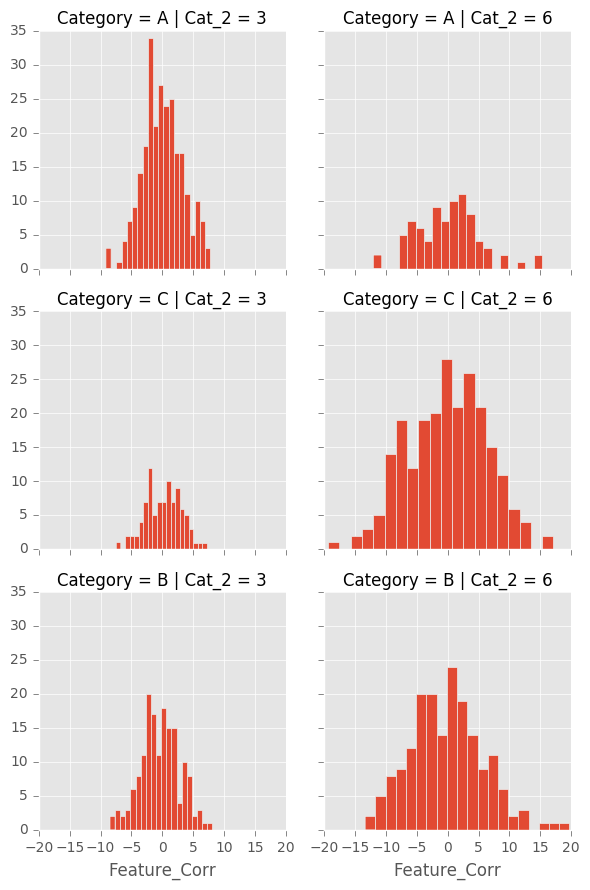

In [78]:
g = sns.FacetGrid(data, col="Cat_2", row="Category", sharex=True)
g.map(plt.hist, "Feature_Corr", bins=20)

---

## Pandas groupby count

In [9]:
data = pd.read_csv('.\\data\\miscellaneous.csv')

In [11]:
data.head()

,Unnamed: 0,Category,Rand,Cat_2,Feature_Corr
0,0,C,-0.465643,3,-2.068468
1,1,C,0.510650,6,3.242106
2,2,B,-0.976027,3,5.240911
3,3,C,0.265092,3,-7.087623
4,4,C,0.566191,6,0.308072


In [31]:
data[["Category"]].groupby(["Category"]).size()

Category
A    315
B    330
C    355
dtype: int64

In [26]:
data[["Category", "Feature_Corr"]].groupby(["Category"]).agg(["sum", "count", "mean"])

Feature_Corr                
                  sum count      mean
Category                             
A         -134.796619   315 -0.427926
B          128.159113   330  0.388361
C          -98.108427   355 -0.276362